In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path_cf =  r"C:\Users\anu10\OneDrive\Documents\Career foundry Python"

In [3]:
path =  r"C:\Users\anu10\OneDrive\Instacart Basket Analysis"

In [4]:
path

'C:\\Users\\anu10\\OneDrive\\Instacart Basket Analysis'

In [5]:
# 1. Imported combined pickle file
df_group = pd.read_pickle(os.path.join(path_cf, '02 Data','Prepared Data', 'df_cust_ords_prods_merged.pkl'))

In [6]:
df_group.head(60)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,Frequency_Flag,First Name,LastName,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,...,NaN,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,...,Non-frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,...,Regular customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,195,196,Soda,77,7,9.0,147387,709,prior,4,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
4,195,196,Soda,77,7,9.0,2322397,709,prior,5,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
5,222,223,Kiwi Strawberry Sparkling Water,115,7,4.0,1284746,709,prior,1,...,Non-frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
6,0,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
7,0,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,...,Regular customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
8,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,...,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797
9,0,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,...,Frequent customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856


In [7]:
df_group.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'busiest_day',
       'Busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spenders', 'Spending_Flag', 'median', 'Frequency_Flag',
       'First Name', 'LastName', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [8]:
df_group.shape

(283448, 35)

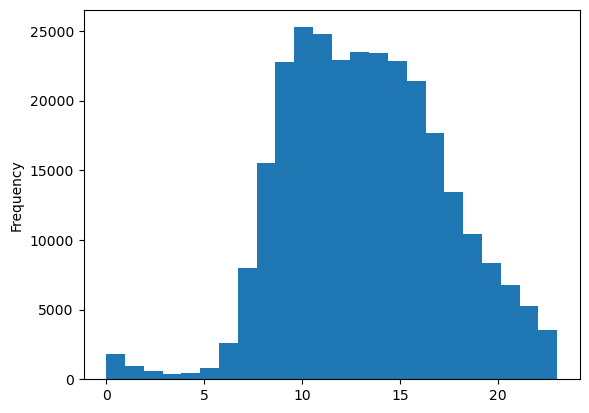

In [9]:
# 3.Create histogram 'order_hour_of_day'
hist = df_group['order_hour_of_day'].plot.hist(bins = 24, x = "hours")

Histogram demonstrate the frequency of shoppers all day. Peak hours are 10-16, Lowest frequency hours 0-6,and frequency drops after hours 16.

In [10]:
 df_group['loyalty_flag'].value_counts()

Regular customer    137631
Loyal customer       91984
New customer         53833
Name: loyalty_flag, dtype: int64

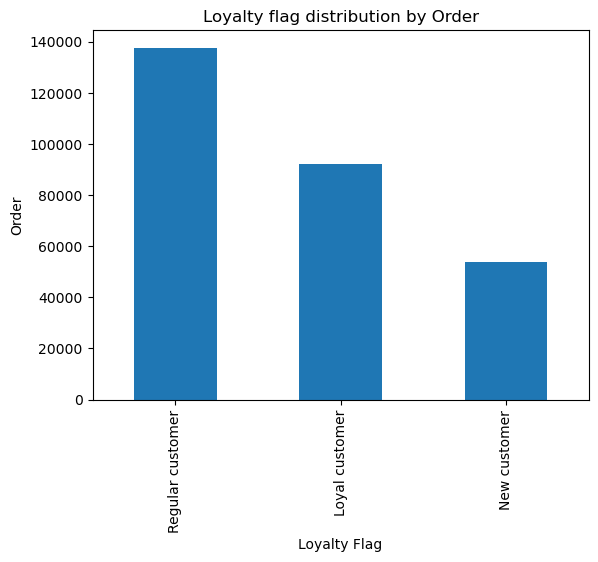

In [11]:
# 4. Create bar chart for Loyalty_flag column
loyalty_flag_order = df_group['loyalty_flag'].value_counts().plot.bar(xlabel = 'Loyalty Flag', ylabel = 'Order',title='Loyalty flag distribution by Order')

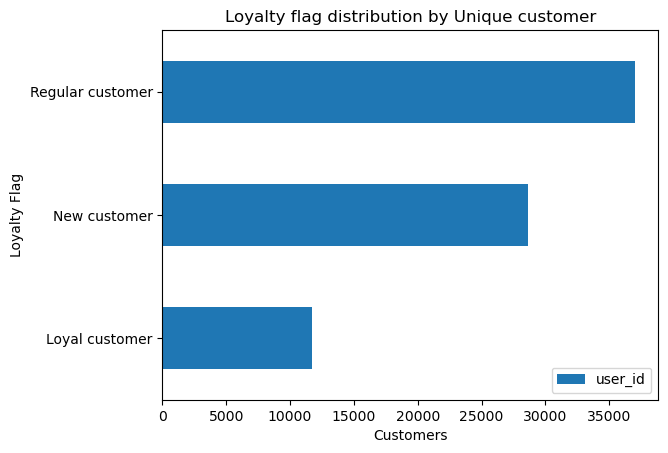

In [12]:
loyalty_flag_unique = df_group.groupby(['loyalty_flag']).agg({'user_id':'nunique'}).plot.barh(
    ylabel = 'Loyalty Flag',
    xlabel = 'Customers',
    title = 'Loyalty flag distribution by Unique customer'
)



#df_group.groupby('loyalty_flag').nunique('user_id')#.plot.bar(xlabel = 'Loyalty Flag', ylabel = 'Order')
#df_group.groupby('user_id').nunique()

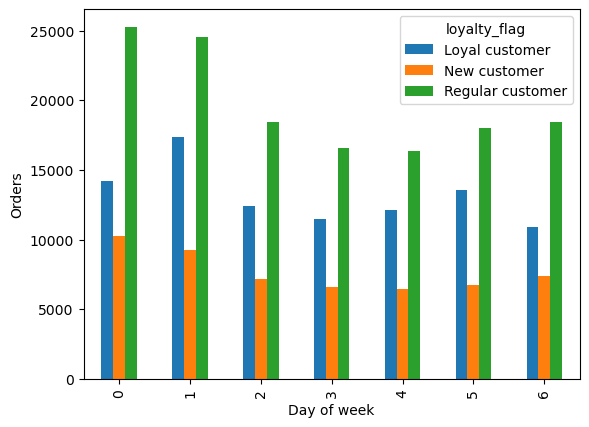

In [13]:
loyalty_counts = df_group.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack()

# Create the bar plot
bar_loyalty_dow = loyalty_counts.plot.bar(xlabel='Day of week',ylabel='Orders')

In [14]:
bar_loyalty_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_dow.png'))

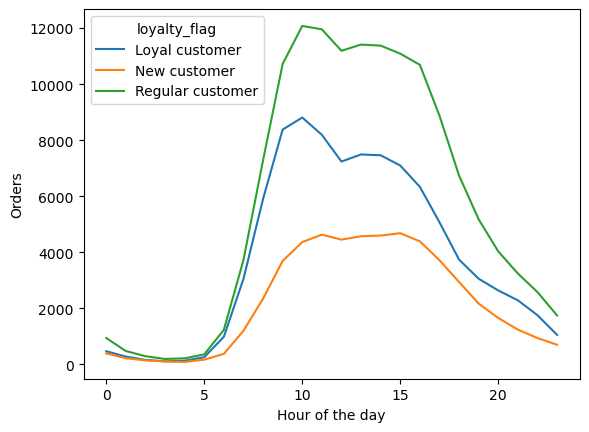

In [15]:
loyalty_counts = df_group.groupby(['order_hour_of_day', 'loyalty_flag']).size().unstack()
bar_loyalty_hod = loyalty_counts.plot.line(xlabel='Hour of the day',ylabel='Orders')

In [16]:
bar_loyalty_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_hod.png'))

In [17]:
np.random.seed(4)
dev = np.random.rand(len(df_group)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
np.random.rand(10)

array([0.68479534, 0.25774419, 0.93693434, 0.93131556, 0.80944004,
       0.36957877, 0.8901213 , 0.81650184, 0.50848662, 0.69367373])

In [20]:
big = df_group[dev].head()

In [21]:
small = df_group[~dev]

In [22]:
len(df_group)

283448

In [23]:
len(big) + len(small)

84941

In [24]:
# 5. line chart to check difference in expenditure between hours of day and prices
df_line = small[['order_hour_of_day','prices']]

In [25]:
df_line

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,21,9.0
6,13,5.8
10,20,5.8
...,...,...
283435,16,3.8
283438,15,3.8
283440,15,3.8
283441,10,3.8


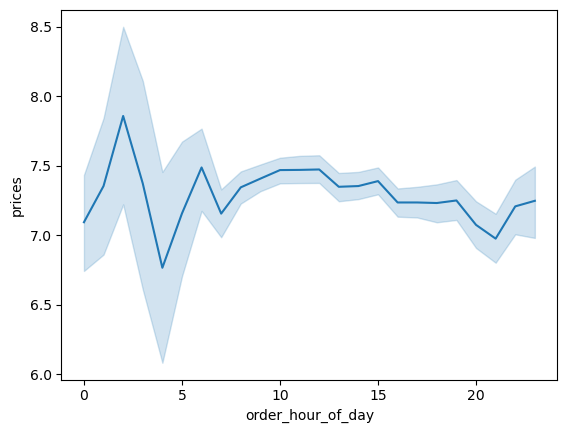

In [26]:
df_line_1 = sns.lineplot(data= df_line,x = 'order_hour_of_day', y = 'prices' )

In [27]:
df_line_1

<AxesSubplot:xlabel='order_hour_of_day', ylabel='prices'>

In [28]:
# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
df_line_2 = small[['Age','n_dependants']]

In [29]:
df_line_2

,Age,n_dependants
0,81,1
2,66,2
3,66,2
6,40,3
10,72,1
...,...,...
283435,38,2
283438,38,2
283440,38,2
283441,38,2


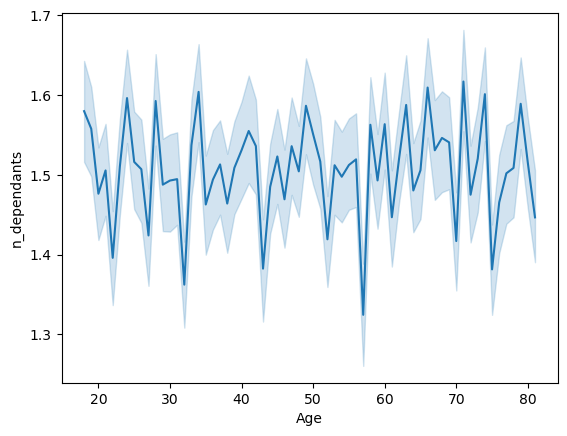

In [30]:
# Line chart if there is connection between age and number of dependants
df_line_3 = sns.lineplot(data= df_line_2,x = 'Age', y = 'n_dependants')#, title = 'Age and Dependents' )

it doesn't seem connection between age and dependents. At the age of 60 may be old age people are dependent on kids. under 30 kids are dependent on parents.

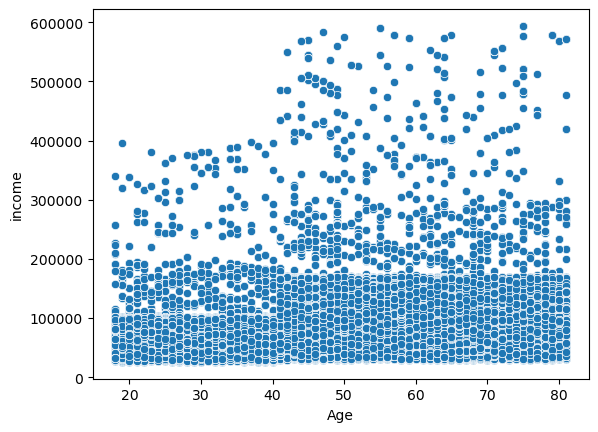

In [31]:
#7. to visualize relationship between age and dependant create a scatterplot function
scat_plot = sns.scatterplot(x = 'Age',y= 'income', data = df_group)

All age groups are making under 200k. Around 40+ age group population are making 300K and up to 600k. Some of them below 40 are making around 400 k. 

In [32]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

In [33]:
df_line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_prices.png'))

In [34]:
df_line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependant.png'))

In [35]:
scat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependant.png'))

In [36]:
# loyal customer by department
df_dep = pd.read_csv(os.path.join(path_cf, '02 Data\Prepared Data\departments_wrangled.csv'),index_col = False)
depts = df_dep
depts_t = depts.iloc[1:]

# Rename the columns
#depts_t.columns = ['department_id', 'department_name']
df_group_merged = pd.merge(depts_t, df_group, on='department_id', how='inner').reset_index()
#df_group_merged.set_index('department_name', inplace=True)
df_group_merged.columns


Index(['index', 'department_id', 'department_name', 'Unnamed: 0', 'product_id',
       'product_name', 'aisle_id', 'prices', 'order_id', 'user_id', 'eval_set',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'busiest_day', 'Busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spenders', 'Spending_Flag', 'median',
       'Frequency_Flag', 'First Name', 'LastName', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

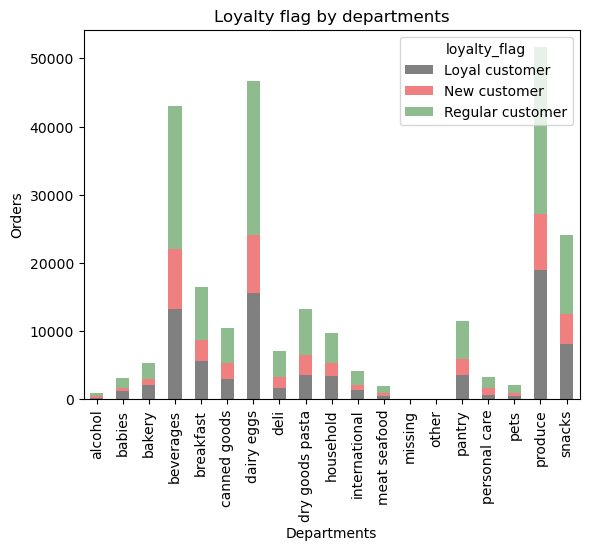

In [37]:

#pd.concat([depts_t, depts_t2], axis=0)#[['index','department_name']]
df_group_dep_loyalty = df_group_merged.groupby(['department_name','loyalty_flag']).size().unstack() #.plot.bar(stacked=True)
bar_color = ['grey','lightcoral','darkseagreen']

loyalty_flag_bar = df_group_dep_loyalty.plot.bar(xlabel = 'Departments',ylabel = 'Orders',title = 'Loyalty flag by departments',stacked=True,color = bar_color)

In [38]:
df_group_dep_loyalty.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alcohol,219,243,481
babies,1260,367,1449
bakery,2064,933,2299
beverages,13331,8735,20976
breakfast,5658,3109,7698


In [39]:
loyalty_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department.png'))

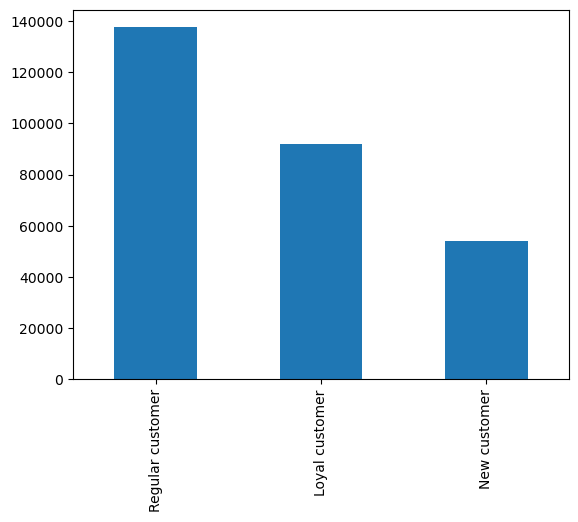

In [40]:
bar_1 = df_group['loyalty_flag'].value_counts().plot.bar()

In [41]:
loyalty_flag_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal customer.png'))

In [42]:
loyalty_flag_unique.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal customer unique.png'))

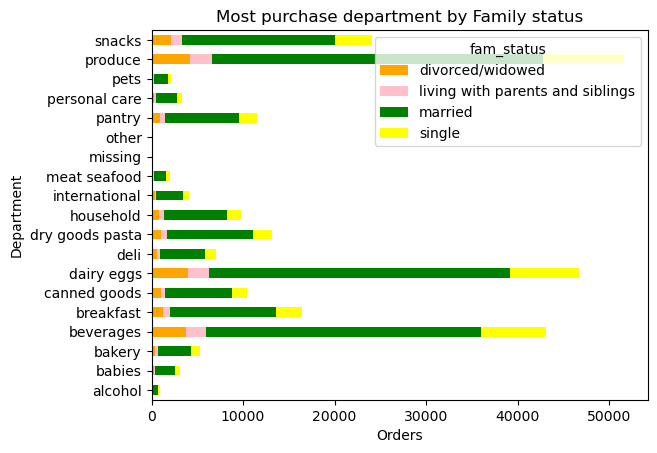

In [43]:
df_group_dep = df_group_merged.groupby(['department_name','fam_status']).size().unstack() 

dep_bar = df_group_dep.plot.barh(xlabel = 'Orders',ylabel = 'Department',title = 'Most purchase department by Family status',color = ['orange','pink','green','yellow'] ,stacked=True)

In [44]:
dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_famstatus.png'))

In [45]:
df_group_merged.columns

Index(['index', 'department_id', 'department_name', 'Unnamed: 0', 'product_id',
       'product_name', 'aisle_id', 'prices', 'order_id', 'user_id', 'eval_set',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'busiest_day', 'Busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spenders', 'Spending_Flag', 'median',
       'Frequency_Flag', 'First Name', 'LastName', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [46]:
df_group_Age = df_group_merged.groupby(['Age']).value_counts().size().unstack()#.plot.bar(stacked=True)

#Age_bar = df_group_Age.plot.bar() #h(xlabel = 'Age',ylabel = 'Orders',title = 'Most purchase department by Family status')#,color = ['orange','pink','green','yellow'] ,stacked=True)

ValueError: Product space too large to allocate arrays!

In [ ]:
df_group_merged.Age